In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
Mouse_metadata_path = "../data/Mouse_metadata.csv"
Study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(Mouse_metadata_path)
study_results = pd.read_csv(Study_results_path)

In [2]:
# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata, study_results, how='outer')

In [3]:
# Display the data table for preview
Combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice=Combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [10]:
summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats_table

summary_stats_table.to_csv("fileOne.csv", index= False, header= True)

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
single_group_by = clean_df.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

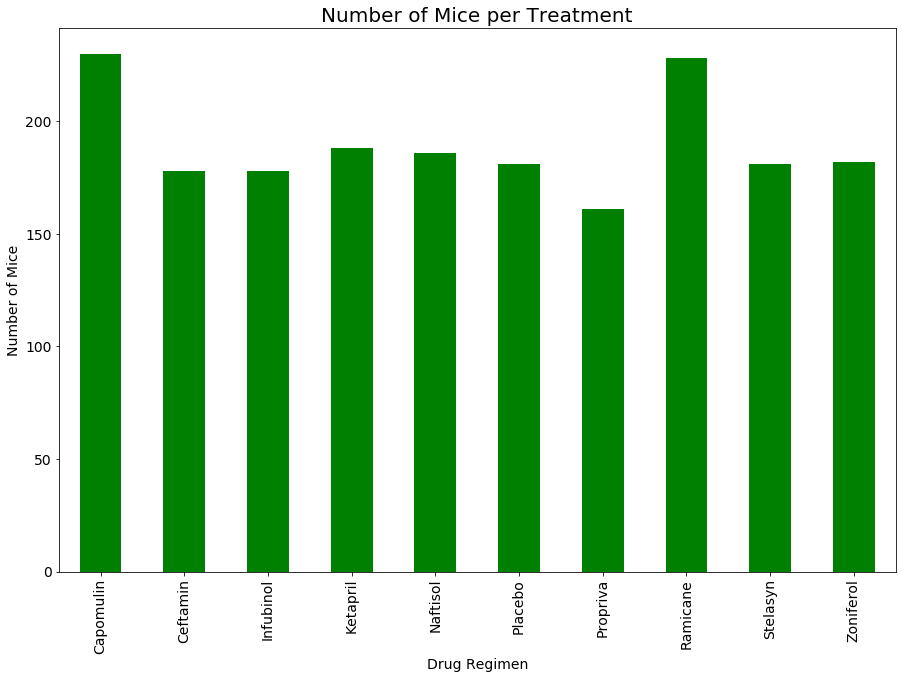

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [32]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

count_mice_per_tret = Combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pandas = count_mice_per_tret.plot.bar(figsize=(15,10), color='g',fontsize = 14)
count_mice_per_tret
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.show()

count_mice_per_tret

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_list =(Combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list


[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

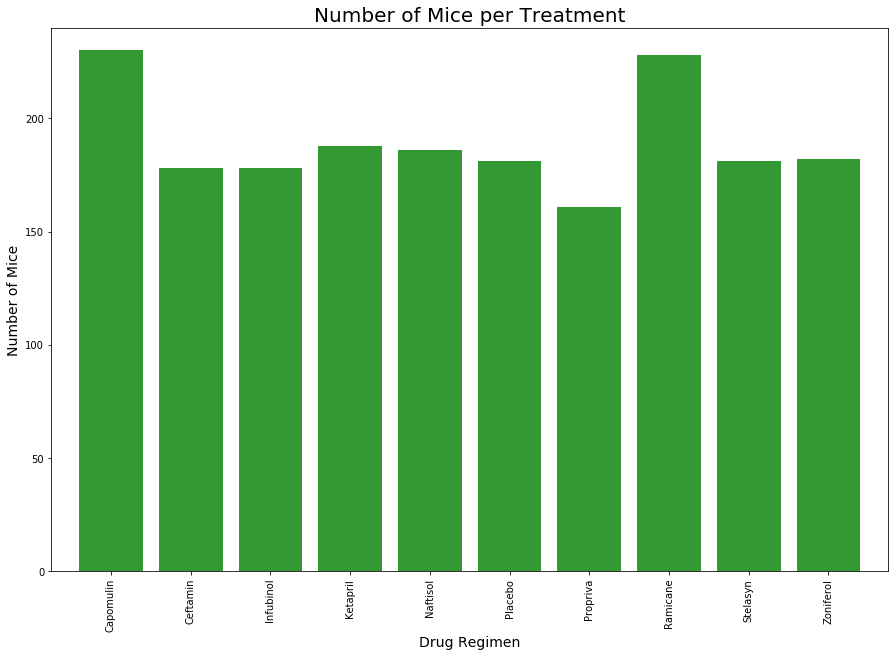

In [33]:
x_axis = np.arange(len(count_mice_per_tret))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_list, color='g', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.show()

In [15]:
# EXTRA Group by gender and get the number to plot
groupby_gender = Combined_data.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


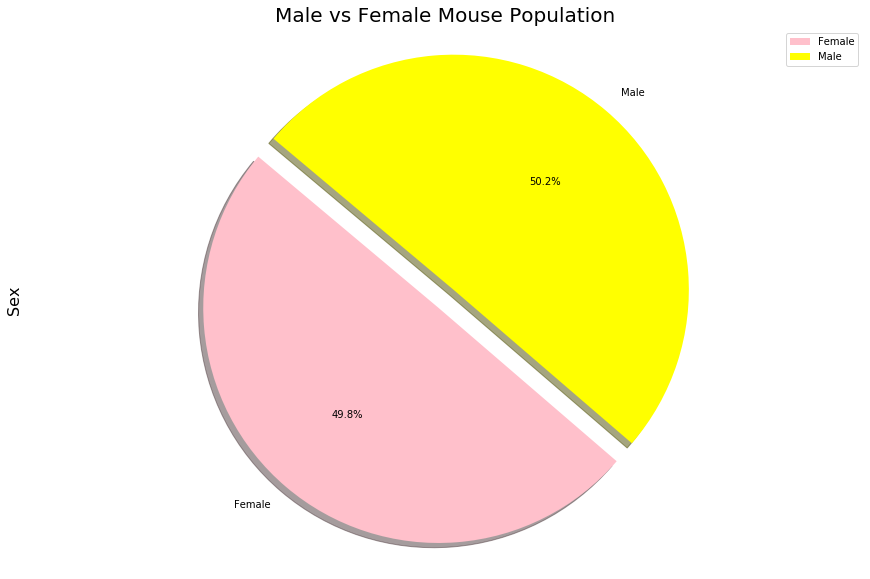

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'yellow']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 16)
plt.axis("equal",fontsize = 16)

plt.show()

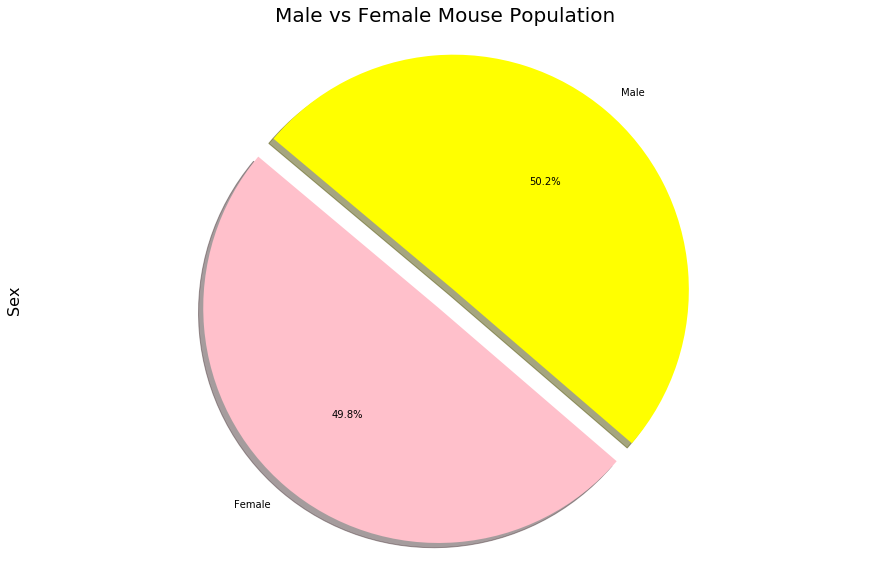

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['pink', 'yellow']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 16)
#Set equal axis
plt.axis("equal",fontsize = 16)
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ceftamin", :]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [19]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
# Ramicane

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")

In [21]:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [22]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [23]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [24]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [34]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


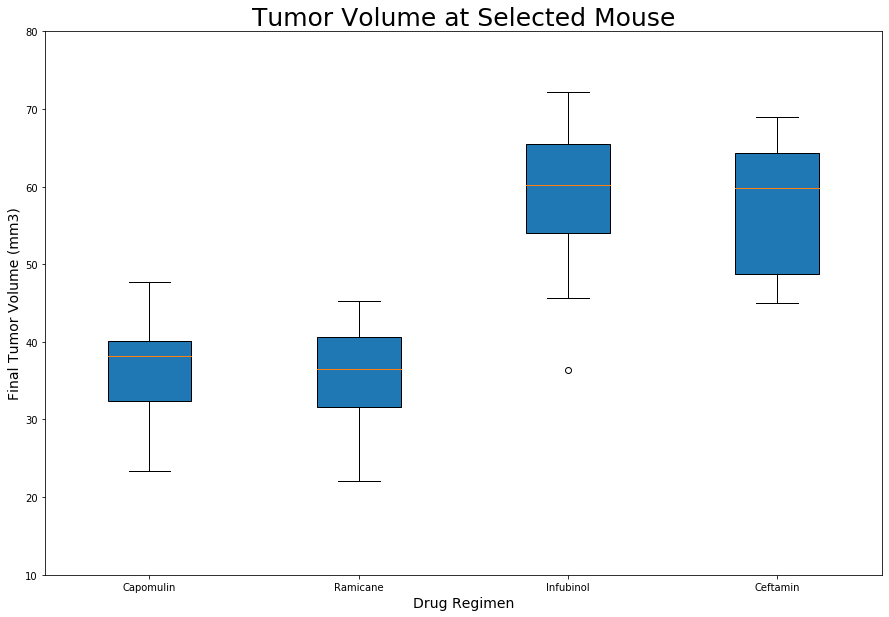

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [26]:
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


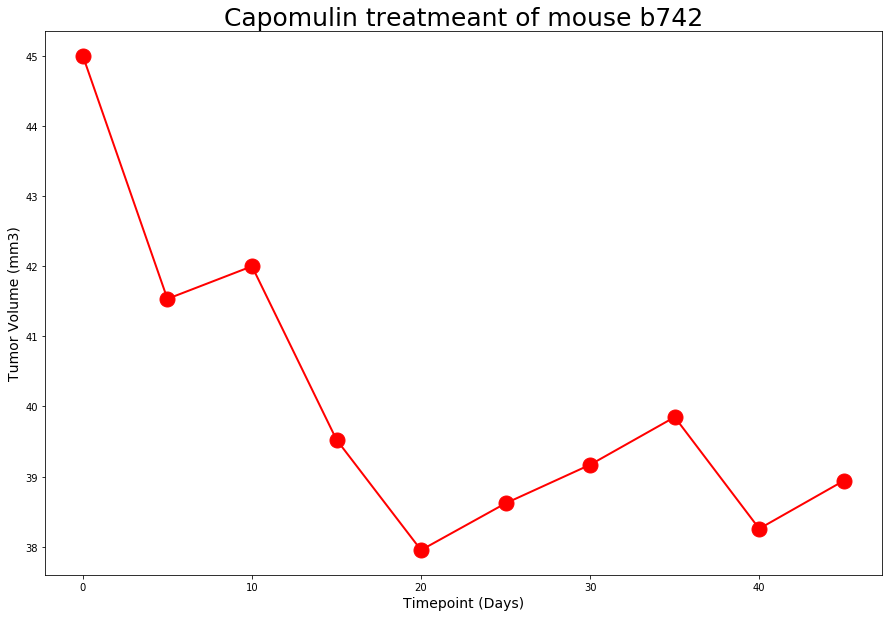

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="red", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)
plt.show()

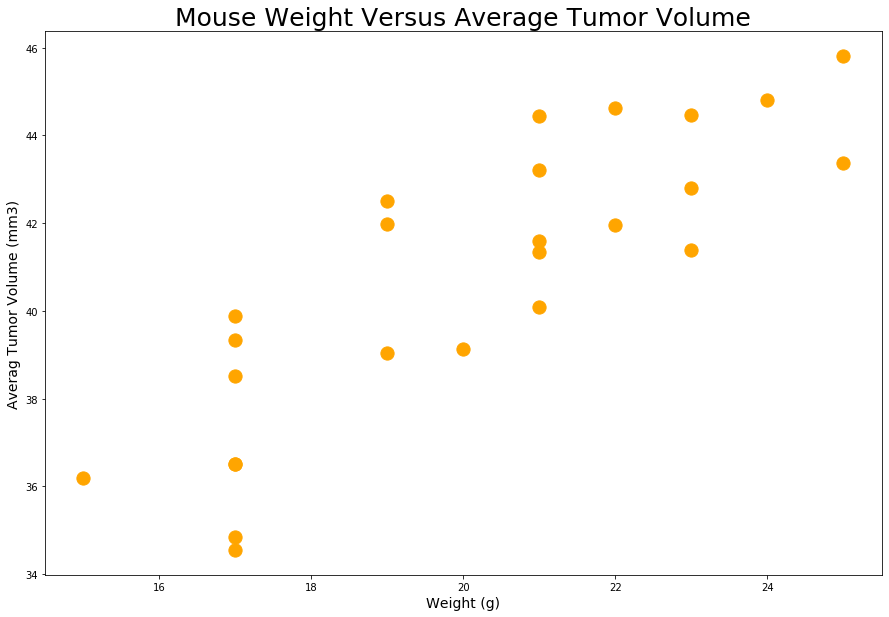

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="orange")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [30]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.12754359033201337
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


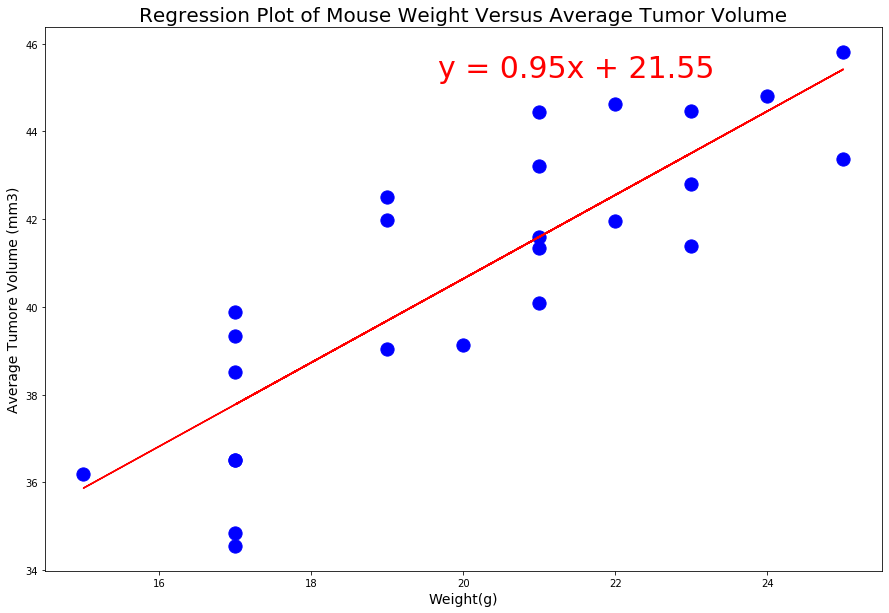

In [31]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()